# Python Notebook - Feature selection for .pdf classification

### Data importation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

This study is based on the output of the `Exiftool` metadata extraction tool. This output is imported below 

In [2]:
files = pd.read_csv('data/metadata.csv', sep=",", encoding="ISO-8859-1", low_memory=False)

In [3]:
n = files.shape[0]
print(f'{files.shape=}')

files.shape=(19979, 389)


There are around 20,000 samples and 400 features. This represent a huge set of features and some selection need to be made. By looking at the file one can notice that there a lot of missing values. We take a look at the missing values rate for each feature.

---

## Ratio of missing values for each feature

In [4]:
na_ratio = files.isnull().sum(axis = 0)/n

### Without exclusion

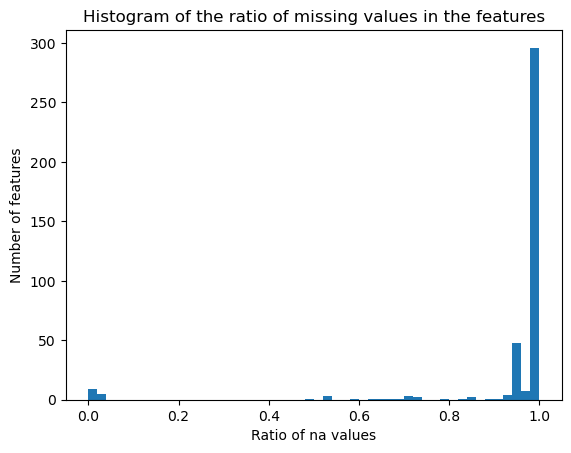

In [5]:
plt.hist(na_ratio, bins=50)
plt.title('Histogram of the ratio of missing values in the features')
plt.xlabel('Ratio of na values'); plt.ylabel('Number of features')
plt.show()

The majority of features have a high na ratio. Those must be removed from the analysis. We define a threshold of exclusion. 

In [6]:
threshold = .9
print("number of removed features:", (na_ratio >= threshold).sum())
print(na_ratio[(na_ratio.values >= threshold) & (na_ratio .values< 1)].index.values)

number of removed features: 356
['About' 'Accessability' 'Accessibility' 'Accessibility0020' 'Accessible'
 'Accessiblilty' 'Accessiblity' 'AIBuildNumber' 'AIColorModel'
 'AIColorUsage' 'AICreatorVersion' 'AINumLayers' 'AIRulerUnits'
 'AITargetResolution' 'AnnotationUsageRights' 'AuthorRef'
 'AuthorsPosition' 'Base0020Target' 'Base_Target' 'BlueMatrixColumn'
 'BlueTRC' 'BoundingBox' 'CaptionWriter' 'Category' 'Changes'
 'ChromaticAdaptation' 'Chronicle' 'CMMFlags' 'ColorSpaceData' 'Comments'
 'Company' 'Conformance' 'ConnectionSpaceIlluminant' 'Contact'
 'ContactRef' 'ContainerVersion' 'ContentTypeId' 'Copyright' 'Created'
 'CreationDate' 'CreationDate--Text' 'CreationDateRef' 'CreatorRef'
 'CreatorVersion' 'CUS_DocIDbchkClientNumber' 'CUS_DocIDbchkDate'
 'CUS_DocIDbchkDocumentName' 'CUS_DocIDbchkDocumentNumber'
 'CUS_DocIDbChkLibDB' 'CUS_DocIDbchkMatterNumber' 'CUS_DocIDbchkTime'
 'CUS_DocIDiPage' 'CUS_DocIDsSeparator' 'Date' 'DateElement-refinement'
 'DCTMDocbaseId' 'DCTMObjectId' 'De

*Note: here are listed the excluded variables, one can look at these individually for forcing their presence in the studied dataset.*

### With Exclusion

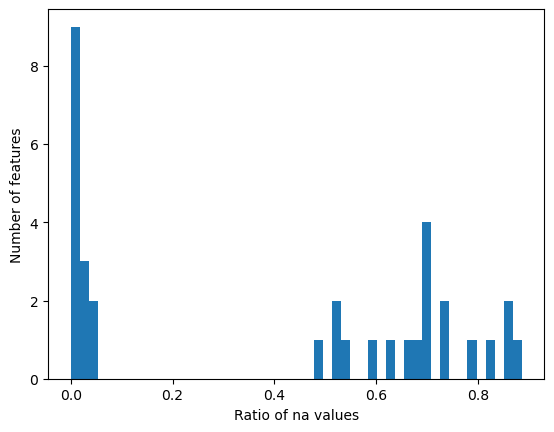

In [7]:
plt.hist(na_ratio[na_ratio < threshold], bins=50)
plt.xlabel('Ratio of na values'); plt.ylabel('Number of features')
plt.show()

In [8]:
na_ratio[na_ratio < threshold].sort_values(ascending=False).head(20)

Keywords        0.885280
HasXFA          0.856599
Description     0.851094
TaggedPDF       0.823014
Subject         0.795635
InstanceID      0.736924
CreatorTool     0.731618
XMPToolkit      0.707843
Format          0.707543
DocumentID      0.707493
MetadataDate    0.696381
Title           0.678613
Author          0.655889
Creator         0.624205
ModifyDate      0.594324
Producer        0.536463
CreateDate      0.528805
PageCount       0.525902
Warning         0.495620
PDFVersion      0.035437
dtype: float64

*Note: here are listed the kept features with the highest na ratio.*

## Features exclusion

We reduce the size of the dataset by removing the unecessenary features and display the resulting data set.

In [9]:
threshold = .9
files_red = files[na_ratio[na_ratio < threshold].index.values].copy()
files_red.head()

,SourceFile,Author,CreateDate,Creator,CreatorTool,Description,Directory,DocumentID,ExifToolVersion,FileAccessDate,...,MIMEType,ModifyDate,PageCount,PDFVersion,Producer,Subject,TaggedPDF,Title,Warning,XMPToolkit
0,CSEC 620 Project/PDF's/CLEAN_PDF_9000_files/02...,lbsmit00,2006:03:30 14:09:13Z,lbsmit00,PageMaker 7.0,NaN,CSEC 620 Project/PDF's/CLEAN_PDF_9000_files,uuid:1e0c3b1e-fb1c-411a-8d43-35aaf55dc631,12.36,2021:12:01 15:53:26-05:00,...,application/pdf,2006:04:06 08:48:54-04:00,34.0,1.4,Acrobat Distiller 5.0 (Windows),NaN,NaN,Unrelated Business Income.pmd,NaN,"XMP toolkit 2.9.1-14, framework 1.6"
1,CSEC 620 Project/PDF's/CLEAN_PDF_9000_files/02...,jnwill00,2006:04:05 09:30:37-04:00,jnwill00,PageMaker 6.5,NaN,CSEC 620 Project/PDF's/CLEAN_PDF_9000_files,uuid:b82d68a3-0461-4037-8344-9a80acda9c58,12.36,2021:12:01 15:53:26-05:00,...,application/pdf,2010:03:22 11:18:17-04:00,29.0,1.6,Acrobat Distiller 6.0.1 (Windows),NaN,NaN,Transactions article.pmd,NaN,"Adobe XMP Core 4.0-c321 44.398116, Tue Aug 04 ..."
2,CSEC 620 Project/PDF's/CLEAN_PDF_9000_files/02...,jnwill00,2005:09:28 08:16:58-04:00,jnwill00,PageMaker 6.5,NaN,CSEC 620 Project/PDF's/CLEAN_PDF_9000_files,uuid:3c1e2fa3-2747-495e-b782-f0614579adc7,12.36,2021:12:01 15:53:26-05:00,...,application/pdf,2005:09:28 08:16:58-04:00,34.0,1.4,Acrobat Distiller 6.0 (Windows),NaN,NaN,"Tax-Exempt Bonds, 1996-2002.pmd",NaN,"XMP toolkit 2.9.1-13, framework 1.6"
3,CSEC 620 Project/PDF's/CLEAN_PDF_9000_files/02...,jnwill00,2004:09:30 13:47:07,Adobe PageMaker 7.0 - [P:\WILLIS\Sum04\ARTICL~...,NaN,NaN,CSEC 620 Project/PDF's/CLEAN_PDF_9000_files,NaN,12.36,2021:12:01 15:53:26-05:00,...,application/pdf,NaN,59.0,1.2,Acrobat PDFWriter 5.0 for Windows NT,NaN,NaN,P:\WILLIS\Sum04\ARTICL~1\SOLEPR,NaN,NaN
4,CSEC 620 Project/PDF's/CLEAN_PDF_9000_files/03...,U.S. Copyright Office,2000:02:10 09:37:43Z,U.S. Copyright Office,NaN,Comments on Exemption to Prohibition on Circum...,CSEC 620 Project/PDF's/CLEAN_PDF_9000_files,NaN,12.36,2021:12:01 15:53:26-05:00,...,application/pdf,2002:04:29 11:59:37-04:00,5.0,1.4,Acrobat Distiller 4.0 for Windows,Comments on Exemption to Prohibition on Circum...,NaN,Comments on Exemption to Prohibition on Circum...,NaN,NaN


---

## Labels extraction
The labels can be extracted from the directory in which the file was initially. Below is an example of the label extraction technique.

In [10]:
# Basic example
filename = "CSEC 620 Project/PDF's/CLEAN_PDF_9000_files"
re.findall('.*/(.*)', filename)[0]

'CLEAN_PDF_9000_files'

Once the technique approved, we apply it to the entire dataset.

In [11]:
label = files_red.Directory.map(lambda x: 'Benign' if 'CLEAN' in re.findall('.*/(.*)', x)[0] else 'Malware').copy()

---

## Features analysis
Now we focus on the features that are kept. We first show all of them and study those individually. 

We will study:
- the **missing values**: the reason why they are missing, and what should we replace them by.
- the **variables format**: convert the variables to their right type.
- the **consistency**: number of categories (grouping some categories for nominal variables, etc.).
- the **new features**: some features can be created by extraction information about a feature. 

In [12]:
print("n_features =", len(files_red.columns))
files_red.columns

n_features = 33


Index(['SourceFile', 'Author', 'CreateDate', 'Creator', 'CreatorTool',
       'Description', 'Directory', 'DocumentID', 'ExifToolVersion',
       'FileAccessDate', 'FileCreateDate', 'FileModifyDate', 'FileName',
       'FilePermissions', 'FileSize', 'FileType', 'FileTypeExtension',
       'Format', 'HasXFA', 'InstanceID', 'Keywords', 'Linearized',
       'MetadataDate', 'MIMEType', 'ModifyDate', 'PageCount', 'PDFVersion',
       'Producer', 'Subject', 'TaggedPDF', 'Title', 'Warning', 'XMPToolkit'],
      dtype='object')

This table contains all the features that can effectively be used for our study. Out of the 33 first variables, some are identifiers (all distinct values) and some are constant (file extension), we can't use those for the classification. 

In [13]:
files_red\
    .drop(
        [
            'SourceFile', 'Directory', 'ExifToolVersion', 'FileAccessDate', 'FilePermissions',\
            'FileTypeExtension',  'FileType', 'Author', 'DocumentID', 'FileCreateDate', 'MIMEType',
            'MetadataDate'
        ], axis = 1)\
    .iloc[:, 10:20] # change the range to browse the features

,Keywords,Linearized,ModifyDate,PageCount,PDFVersion,Producer,Subject,TaggedPDF,Title,Warning
0,NaN,Yes,2006:04:06 08:48:54-04:00,34.0,1.4,Acrobat Distiller 5.0 (Windows),NaN,NaN,Unrelated Business Income.pmd,NaN
1,NaN,No,2010:03:22 11:18:17-04:00,29.0,1.6,Acrobat Distiller 6.0.1 (Windows),NaN,NaN,Transactions article.pmd,NaN
2,NaN,Yes,2005:09:28 08:16:58-04:00,34.0,1.4,Acrobat Distiller 6.0 (Windows),NaN,NaN,"Tax-Exempt Bonds, 1996-2002.pmd",NaN
3,NaN,No,NaN,59.0,1.2,Acrobat PDFWriter 5.0 for Windows NT,NaN,NaN,P:\WILLIS\Sum04\ARTICL~1\SOLEPR,NaN
4,"copyright, anticircumvention, 1201",Yes,2002:04:29 11:59:37-04:00,5.0,1.4,Acrobat Distiller 4.0 for Windows,Comments on Exemption to Prohibition on Circum...,NaN,Comments on Exemption to Prohibition on Circum...,NaN
...,...,...,...,...,...,...,...,...,...,...
19974,NaN,No,NaN,NaN,1.3,NaN,NaN,NaN,NaN,Invalid xref table
19975,NaN,No,NaN,NaN,1.3,NaN,NaN,NaN,NaN,Invalid xref table
19976,NaN,No,NaN,NaN,1.6,NaN,NaN,NaN,NaN,Invalid xref table
19977,NaN,No,NaN,NaN,1.3,NaN,NaN,NaN,NaN,Invalid xref table


### Author/Creators

Lots of similarity between those two features. We create a new flag if they are different and only keep the `Creator` feature and it has less missing values.

In [14]:
files_red.Author.isna().sum()

13104

In [15]:
isAuthorCreator = (files_red.Author == files_red.Creator)
hasCreator = files_red.Creator.isna()

Creator = files_red.Creator.copy()
Creator[Creator.isna()] = "None"

### Creator Tool

Removing some extra information help grouping the categories together as there are too much. Here are two examples of what is done for this purpose.

In [16]:
print(re.sub(' for .*', '', "Acrobat PDFMaker 8.1 for Word"))
print(re.sub(' \(.*\)?', '', "Adobe InDesign CS4 (6.0.6)"))

Acrobat PDFMaker 8.1
Adobe InDesign CS4


In [17]:
CreatorTool = files_red.CreatorTool.copy()

CreatorTool = CreatorTool.map(lambda x: re.sub(' for .*',  '', x), na_action="ignore")
CreatorTool = CreatorTool.map(lambda x: re.sub(' \(.*\)?', '', x), na_action="ignore")

In [18]:
counts = CreatorTool.value_counts()
to_throw = list(counts.index[counts<20].values)

CreatorTool = CreatorTool.map(lambda x: "Other" if x in to_throw else x, na_action="ignore")
CreatorTool[CreatorTool.isna()] = "Unknown"

CreatorTool.value_counts()

Unknown                                                     14617
Acrobat PDFMaker 8.1                                          955
Adobe LiveCycle Designer ES 8.2                               942
FUJITSU fi-6230dj                                             924
PScript5.dll Version 5.2.2                                    645
PScript5.dll Version 5.2                                      452
Other                                                         256
Amgraf OneForm Designer Plus                                  239
Acrobat PDFMaker 7.0                                          109
Acrobat PDFMaker 6.0                                           97
FUJITSU fi-6230dj #2                                           84
Adobe InDesign CS5                                             61
Acrobat PDFMaker 8.0                                           59
OneForm Designer Plus                                          56
Adobe InDesign CS3                                             54
Acrobat PD

*Note: we also group the categories that have the smallest number of values together and group the NaN in an unknwown category.* 

### Producer

The same protocol as `CreatorTool` has been applied to `Producer`.

In [19]:
Producer = files_red.Producer.copy()

Producer = Producer.map(lambda x: re.sub(' for .*',  '', x), na_action="ignore")
Producer = Producer.map(lambda x: re.sub(' \(.*\)?', '', x), na_action="ignore")

In [20]:
counts = Producer.value_counts()
to_throw = list(counts.index[counts<50].values)

Producer = Producer.map(lambda x: "Other" if x in to_throw else x, na_action="ignore")
Producer[Producer.isna()] = "Unknown"

Producer.value_counts()

Unknown                                               10718
Other                                                  1066
Adobe LiveCycle Designer ES 8.2                         941
Hewlett-Packard Intelligent Scanning Technology\r3      877
PDFScanLib v1.2.2 in Adobe Acrobat 8.1.1                562
Acrobat Distiller 8.1.0                                 540
Acrobat 4.0 Scan Plug-in                                470
Acrobat Distiller 5.0.5                                 470
Adobe Acrobat 9.0 Paper Capture Plug-in                 373
Acrobat Distiller 4.0                                   338
Acrobat Distiller 6.0.1                                 285
Acrobat Distiller 6.0                                   284
Adobe PDF Library 5.0.2                                 263
Acrobat Distiller 8.2.5                                 209
Acrobat Distiller 8.2.6                                 206
Acrobat Distiller 5.0                                   205
Acrobat Distiller 7.0                   

### Description
`Description` is a description text. Only the presence of a description has been set as a new feature out of the information given by `Description`. 

In [21]:
hasDescription = files_red.Description.copy()

In [22]:
hasDescription = hasDescription.map(lambda x: not(pd.isna(x)))
hasDescription.value_counts()

False    17004
True      2975
Name: Description, dtype: int64

### Warning
Check the presence of warning.

In [23]:
hasWarning = files_red.Warning.copy()
hasWarning = hasWarning.map(lambda x: not(pd.isna(x)))
hasWarning.value_counts()

True     10077
False     9902
Name: Warning, dtype: int64

### Title
Check the presence of a title.

In [24]:
hasTitle = files_red.Title.copy()
hasTitle = hasTitle.map(lambda x: not(pd.isna(x)))
hasTitle.value_counts()

False    13558
True      6421
Name: Title, dtype: int64

### Tagged pdf
Check if the pdf is tagged.

In [25]:
TaggedPDF = files_red.TaggedPDF.copy()
TaggedPDF = TaggedPDF.map(lambda x: not(pd.isna(x)))
TaggedPDF.value_counts()

False    16443
True      3536
Name: TaggedPDF, dtype: int64

### Keywords

Check the presence of keywords.

In [26]:
hasKeywords = files_red.Keywords.copy()

In [27]:
hasKeywords = hasKeywords.map(lambda x: not(pd.isna(x)))
hasKeywords.value_counts()

False    17687
True      2292
Name: Keywords, dtype: int64

### Subject

Check the presence of a subject.

In [28]:
hasSubject = files_red.Subject.copy()
hasSubject = hasSubject.map(lambda x: not(pd.isna(x)))
hasSubject.value_counts()

False    15896
True      4083
Name: Subject, dtype: int64

### Linearized

Check if the document in linearized.

In [29]:
Linearized = files_red.Linearized.copy()
Linearized = Linearized.map(lambda x: x == "Yes")
Linearized.value_counts()

False    14307
True      5672
Name: Linearized, dtype: int64

### Date

Importation of information about the dates: creation date, modification date.

In [30]:
import dateparser

In [31]:
def reformat_date(string):
    return string[:10].replace(':', '/') + string[10:]

dateparser.parse(reformat_date("2006:04:05 09:30:37-04:00"))

datetime.datetime(2006, 4, 5, 9, 30, 37, tzinfo=<StaticTzInfo 'UTC\-04:00'>)

#### File Creation Date

In [32]:
CreateDate = files_red.CreateDate.copy()
CreateDate = CreateDate.map( lambda x: dateparser.parse(reformat_date(x)), na_action="ignore")

#### File Modification Date

In [33]:
FileModifyDate = files_red.FileModifyDate.copy()
FileModifyDate = FileModifyDate.map( lambda x: dateparser.parse(reformat_date(x)), na_action="ignore")

#### Modification Date

In [34]:
ModifyDate = files_red.ModifyDate.copy()
ModifyDate = ModifyDate.map( lambda x: dateparser.parse(reformat_date(x)), na_action="ignore")

#### Modification Timezone

In [35]:
ModificationTZ = ModifyDate.copy()
ModificationTZ = ModificationTZ.map(lambda x: x.tzname(), na_action="ignore")

counts = ModificationTZ.value_counts()
to_throw = list(counts.index[counts<10].values)

ModificationTZ = ModificationTZ.map(lambda x: "Other" if x in to_throw else x, na_action="ignore")
ModificationTZ[ModificationTZ.isna()] = "Unknown"

In [36]:
print("n = ", ModificationTZ.value_counts().sum())
ModificationTZ.value_counts()

n =  19979


Unknown       12281
UTC\-04:00     3938
UTC\-05:00     3192
UTC\-03:00      228
UTC\-06:00       87
UTC\+08:00       66
Z                51
UTC\+03:00       46
UTC\-08:00       34
UTC\-07:00       21
UTC\+04:00       19
Other            16
Name: ModifyDate, dtype: int64

#### Creation Year

In [37]:
CreationYear = CreateDate.copy()
CreationYear = CreationYear.map(lambda x: str(x.year), na_action="ignore")
CreationYear[CreationYear.isna()] = "Unknown"

#### Modification Year

In [38]:
ModificationYear = ModifyDate.copy()
ModificationYear = ModificationYear.map(lambda x: str(x.year), na_action="ignore")
ModificationYear[ModificationYear.isna()] = "Unknown"

### Filename

Extract the name of the file. It can be an useful identifier of the samples. We also create an identifier for the length of the filename.

In [39]:
FileName = files_red.FileName.copy()

In [40]:
LenFileName = FileName.map(lambda x: len(x))

### PageCount

Number of pages which is set to 0 if there isn't any page.

In [41]:
PageCount = files_red.PageCount.copy()
PageCount[PageCount.isna()] = 0

### PDFVersion
Extract the PDF version. The version is rounded to its first decimal to avoid too much categories.

In [42]:
PDFVersion = files_red.PDFVersion.copy()

PDFVersion = PDFVersion.map(lambda x: str(np.round(x, 1)), na_action="ignore")
PDFVersion[PDFVersion.isna()] = 'Unknwown'

PDFVersion.value_counts()

1.3         8358
1.4         3938
1.7         2174
1.6         1994
1.2         1520
Unknwown     708
1.0          581
1.5          491
1.1          215
Name: PDFVersion, dtype: int64

### File size

Extraction of information about the size. Some sizes are in `bytes` and need to be converted.

In [43]:
FileSize = files_red.FileSize.copy()
FileSize = FileSize.map(lambda x: float(x.replace("KiB", "")) if "KiB" in x else int(x.replace("bytes", ""))/1024)

### HasXFA

Check if the files has XFA.

In [44]:
HasXFA = files_red.HasXFA.copy()
HasXFA[HasXFA.isna()] = 'No'
HasXFA = HasXFA.map(lambda x: x == "Yes" )

HasXFA.value_counts()

False    19318
True       661
Name: HasXFA, dtype: int64

### XMPToolkit

Check if the file has XML Toolkit.

In [45]:
hasXMPToolkit = files_red.XMPToolkit.copy()
hasXMPToolkit = hasXMPToolkit.map(lambda x: not(pd.isna(x)))
hasXMPToolkit.value_counts()

False    14142
True      5837
Name: XMPToolkit, dtype: int64

---

## Data Frame Creation

Here is a summary of the kept variables and their type:

*Identifiers*:
- `Filename`
- `label`

*Continuous*:
- `CreateDate`
- `ModifyDate`
- `FileModifyDate`
- `PageCount`
- `FileSize`
- `LenFileName`

*Categorical*:
- `hasCreator`
- `CreationYear`
- `ModificationYear`
- `ModificationTZ`
- `isAuthorCreator`
- `CreatorTool`
- `Producer`
- `hasWarning`
- `TaggedPDF`
- `hasTitle`
- `hasKeywords`
- `hasSubject`
- `hasDescription`
- `Linearized`
- `PDFVersion`
- `HasXFA`
- `hasXMPToolkit`

### Creating final dataset

In [46]:
files_final = pd.DataFrame({
    # Categorical
    "hasCreator": hasCreator,
    "isAuthorCreator": isAuthorCreator,
    "CreatorTool": CreatorTool,
    "Producer": Producer,
    "hasWarning": hasWarning,
    "TaggedPDF": TaggedPDF,
    "hasTitle": hasTitle,
    "hasKeywords": hasKeywords,
    "hasSubject": hasSubject,
    "hasDescription": hasDescription,
    "Linearized": Linearized,
    "PDFVersion": PDFVersion,
    "HasXFA": HasXFA,
    "hasXMPToolkit": hasXMPToolkit,
    "ModificationTZ": ModificationTZ,
    "CreationYear":CreationYear,
    "ModificationYear":ModificationYear,

    # Continuous
    "CreateDate": CreateDate,
    "ModifyDate": ModifyDate,
    # "FileModifyDate": FileModifyDate,
    "PageCount": PageCount,
    "FileSize": FileSize,
    "LenFileName": LenFileName
})

files_final

,hasCreator,isAuthorCreator,CreatorTool,Producer,hasWarning,TaggedPDF,hasTitle,hasKeywords,hasSubject,hasDescription,...,HasXFA,hasXMPToolkit,ModificationTZ,CreationYear,ModificationYear,CreateDate,ModifyDate,PageCount,FileSize,LenFileName
0,False,True,Other,Acrobat Distiller 5.0,False,False,True,False,False,False,...,False,True,UTC\-04:00,2006,2006,2006-03-30 14:09:13+00:00,2006-04-06 08:48:54-04:00,34.0,388.0,13
1,False,True,Other,Acrobat Distiller 6.0.1,False,False,True,False,False,False,...,False,True,UTC\-04:00,2006,2010,2006-04-05 09:30:37-04:00,2010-03-22 11:18:17-04:00,29.0,245.0,12
2,False,True,Other,Acrobat Distiller 6.0,False,False,True,False,False,False,...,False,True,UTC\-04:00,2005,2005,2005-09-28 08:16:58-04:00,2005-09-28 08:16:58-04:00,34.0,241.0,12
3,False,False,Unknown,Acrobat PDFWriter 5.0,False,False,True,False,False,False,...,False,False,Unknown,2004,Unknown,2004-09-30 13:47:07,NaN,59.0,359.0,10
4,False,True,Unknown,Acrobat Distiller 4.0,False,False,True,True,True,True,...,False,False,UTC\-04:00,2000,2002,2000-02-10 09:37:43+00:00,2002-04-29 11:59:37-04:00,5.0,32.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19974,True,False,Unknown,Unknown,True,False,False,False,False,False,...,False,False,Unknown,Unknown,Unknown,NaN,NaN,0.0,299.0,44
19975,True,False,Unknown,Unknown,True,False,False,False,False,False,...,False,False,Unknown,Unknown,Unknown,NaN,NaN,0.0,9.6,44
19976,True,False,Unknown,Unknown,True,False,False,False,False,False,...,False,False,Unknown,Unknown,Unknown,NaN,NaN,0.0,15.0,44
19977,True,False,Unknown,Unknown,True,False,False,False,False,False,...,False,False,Unknown,Unknown,Unknown,NaN,NaN,0.0,7.5,44


### Save dataframe

In [47]:
df_out = files_final.copy()
df_out['Label'] = label
df_out.to_csv('data/new_metadata.csv', index=False)